# Simple Ridge Regression

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

In [7]:
X,y = make_regression(n_samples=1000,n_features=1,noise=70,random_state=41)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

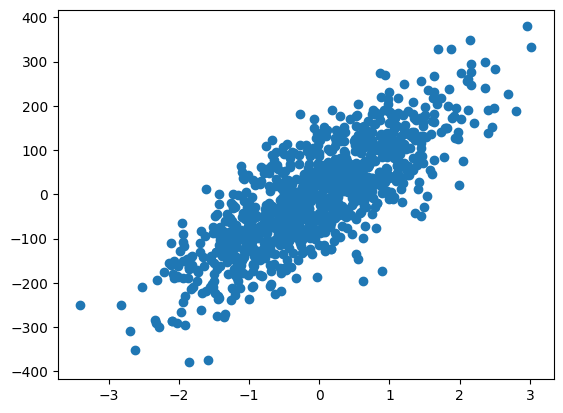

In [8]:
plt.scatter(X,y)

In [27]:
class SimpleRidgeRegression:

    def __init__(self,alpha):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self,X,y):
        
        numerator = 0
        denominator = 0
        mean_x = X.mean()
        mean_y = y.mean()

        for i in range(len(X)):
            
            x_sub = X[i] - mean_x
            y_sub = y[i] - mean_y
            numerator += np.dot(x_sub,y_sub)
            denominator += self.alpha + x_sub**2
        
        self.m = numerator/denominator
        self.b = mean_y - self.m * mean_x

    def predict(self,X):
        return self.m * X + self.b

In [28]:
lr = LinearRegression()
sr = SimpleRidgeRegression(alpha=1)
ridge = Ridge()

for model in [lr,sr,ridge]:
    print("-----------")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(f"Metrics for {model}")
    print(f"R2 Score: {r2_score(y_test,y_pred)}")
    print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test,y_pred))}")

    
    # plt.figure(figsize=(12,10))
    # plt.scatter(X,y)
    # plt.plot(X,y_pred,color="r")
    # plt.xlabel("X")
    # plt.xlabel("y")
    # plt.show()

-----------
Metrics for LinearRegression()
R2 Score: 0.622413181647754
RMSE Score: 71.64748883778309
-----------
Metrics for <__main__.SimpleRidgeRegression object at 0x0000026A7C213F80>
R2 Score: 0.4678773285764547
RMSE Score: 85.05472456923725
-----------
Metrics for Ridge()
R2 Score: 0.6224313913714572
RMSE Score: 71.64576116001098


# Multiple Ridge Regression

In [33]:
class MultipleRidge:
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X,y):

        X = np.insert(X,0,1,axis=1)
        I = np.identity(X.shape[1])

        result = np.linalg.inv(np.dot(X.T,X) + self.alpha * I).dot(X.T).dot(y)
        self.intercept_ = result[0]
        self.coef_ = result[1:]

    def predict(self,X):
        return np.dot(X,self.coef_) + self.intercept_

In [32]:
X,y = make_regression(n_samples=1000,n_features=20,noise=70,random_state=41)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [35]:
mrr = MultipleRidge()
mrr.fit(X_train,y_train)
y_pred = mrr.predict(X_test)
r2_score(y_test,y_pred)

0.8944913002587535

### Multiple Ridge Using Gradient Descent

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [77]:
class RidgeGD:
    
    def __init__(self, epochs, learning_rate, alpha):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X, y):
        # Initialize coefficients and intercept
        self.coef_ = np.ones(X.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_, 0, self.intercept_)
        
        # Add a column of ones to X for the intercept term
        X = np.insert(X, 0, 1, axis=1)
        
        # Gradient Descent
        for i in range(self.epochs):
            # Calculate the gradient (including regularization for coefficients only)
            gradient = (np.dot(X.T, X).dot(thetha) - np.dot(X.T, y)) / X.shape[0]
            gradient[1:] += (self.alpha / X.shape[0]) * thetha[1:]  # Regularization term (excluding intercept)
            
            # Update thetha
            thetha = thetha - self.learning_rate * gradient
        
        # Update coefficients and intercept
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

In [75]:
reg = RidgeGD(epochs=50,alpha=0.1,learning_rate=0.1)

In [76]:
reg.fit(X_train_trf,y_train)

y_pred = reg.predict(X_test_trf)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.8937784729302749
[ 6.12145395e+01  1.82958407e-02  9.89964334e+01  4.92230951e+01
 -2.49190841e-02 -2.59428040e+00  1.75755282e+01 -4.49603025e-01
 -1.64012735e+00  5.17356172e-01  1.15888986e+01  1.38071702e+00
  5.43835202e+01  7.67475131e+01 -1.38533022e+00 -3.98120326e+00
 -3.30139583e+00  4.19813874e+01  8.48564423e+01  6.51958036e+01]
5.427805318764576
